In [2]:
import pandas as pd 

reviews_df = pd.read_csv('playstore_reviews.csv')
reviews_df = reviews_df.drop(columns='package_name')
print(reviews_df)

                                                review  polarity
0     privacy at least put some option appear offli...         0
1     messenger issues ever since the last update, ...         0
2     profile any time my wife or anybody has more ...         0
3     the new features suck for those of us who don...         0
4     forced reload on uploading pic on replying co...         0
..                                                 ...       ...
886   loved it i loooooooooooooovvved it because it...         1
887   all time legendary game the birthday party le...         1
888   ads are way to heavy listen to the bad review...         0
889   fun works perfectly well. ads aren't as annoy...         1
890   they're everywhere i see angry birds everywhe...         1

[891 rows x 2 columns]


In [3]:
reviews_df["review"] = reviews_df["review"].str.strip().str.lower()
print(reviews_df)


                                                review  polarity
0    privacy at least put some option appear offlin...         0
1    messenger issues ever since the last update, i...         0
2    profile any time my wife or anybody has more t...         0
3    the new features suck for those of us who don'...         0
4    forced reload on uploading pic on replying com...         0
..                                                 ...       ...
886  loved it i loooooooooooooovvved it because it ...         1
887  all time legendary game the birthday party lev...         1
888  ads are way to heavy listen to the bad reviews...         0
889  fun works perfectly well. ads aren't as annoyi...         1
890  they're everywhere i see angry birds everywher...         1

[891 rows x 2 columns]


In [4]:
reviews_df['polarity'].value_counts()

polarity
0    584
1    307
Name: count, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(reviews_df['review'], reviews_df['polarity'], test_size=0.2, random_state=42)


### Turn Text into Binary using CountVectorizer

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vec_model = CountVectorizer(stop_words = "english")
X_train_vec = vec_model.fit_transform(X_train).toarray()
X_test_vec = vec_model.transform(X_test).toarray()

In [7]:
print(X_test_vec)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Classification Report

In [8]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

bnb = BernoulliNB()
bnb.fit(X_train_vec, y_train)

y_pred = bnb.predict(X_test_vec)
report = classification_report(y_pred, y_test)

print(report)



              precision    recall  f1-score   support

           0       0.99      0.65      0.79       693
           1       0.06      0.74      0.10        19

    accuracy                           0.66       712
   macro avg       0.52      0.70      0.44       712
weighted avg       0.96      0.66      0.77       712



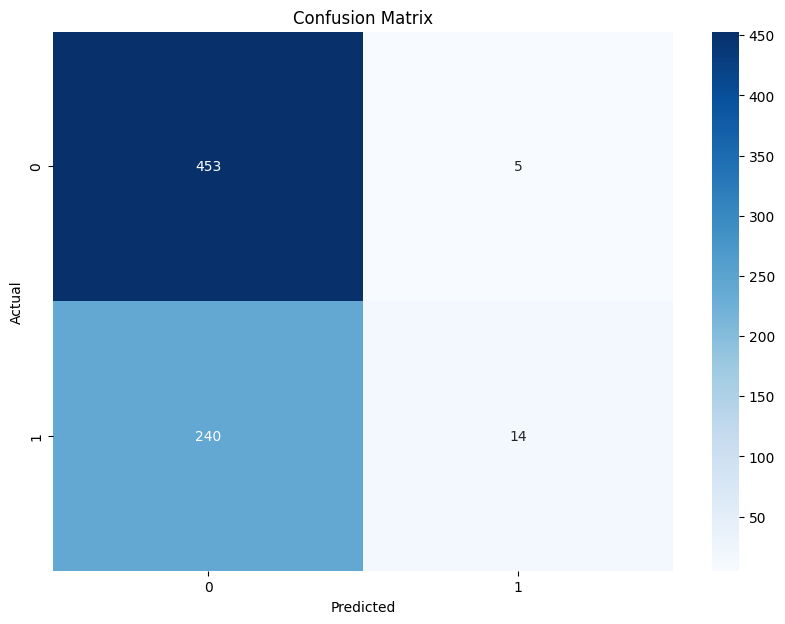

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
    'binarize': [0.0, 0.5, 1.0],
   
}

grid_search = GridSearchCV(BernoulliNB(), param_grid, cv=5, scoring='precision')
grid_search.fit(X_train_vec, y_train)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Precision Score: {grid_search.best_score_}')


c:\Users\624796\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\624796\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\624796\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

Best Parameters: {'alpha': 0.1, 'binarize': 0.0}
Best Precision Score: 0.47640350877192983


c:\Users\624796\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\624796\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\624796\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [11]:
# Create a BernoulliNB classifier with specified parameters
bnb = BernoulliNB(alpha=0.1, binarize=0.0, fit_prior=True)

# Train the classifier
bnb.fit(X_train_vec, y_train)

# Predict the labels for the test data
y_pred = bnb.predict(X_test_vec)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       458
           1       0.67      0.54      0.59       254

    accuracy                           0.74       712
   macro avg       0.72      0.69      0.70       712
weighted avg       0.73      0.74      0.73       712



In [12]:
best_bnb = grid_search.best_estimator_
best_bnb.fit(X_train_vec, y_train)

y_pred = best_bnb.predict(X_test_vec)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       458
           1       0.67      0.54      0.59       254

    accuracy                           0.74       712
   macro avg       0.72      0.69      0.70       712
weighted avg       0.73      0.74      0.73       712



### Multinomial

In [13]:
from sklearn.naive_bayes import MultinomialNB


# Train a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

y_pred = nb.predict(X_test_vec)
report = classification_report(y_pred, y_test)

print(report)

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       572
           1       0.35      0.64      0.46       140

    accuracy                           0.70       712
   macro avg       0.62      0.68      0.62       712
weighted avg       0.79      0.70      0.73       712



### Gaussian

In [14]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_vec, y_train)

y_pred = gnb.predict(X_test_vec)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       458
           1       0.66      0.29      0.40       254

    accuracy                           0.69       712
   macro avg       0.68      0.60      0.60       712
weighted avg       0.69      0.69      0.65       712



In [15]:
import joblib 
# Save the model and vectorizer using joblib
joblib.dump(bnb, 'bernoulli_nb_model.joblib')
joblib.dump(vec_model, 'vectorizer.joblib')


['vectorizer.joblib']